In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
tamanhos_testes = np.linspace(10, 3000, 1990)
tamanhos_testes = np.int32(tamanhos_testes)
tamanhos_testes

array([  10,   11,   13, ..., 2996, 2998, 3000], dtype=int32)

In [4]:
datfram = pd.read_csv('./resultado_experimento.csv', index_col=[0])
datfram

,G_Merge,G_Insertion,G_Bucket,Jarvis
Tamanho,,,,
10,0.00355,0.00904,0.003339,0.00334
10,0.00351,0.00689,0.003300,0.00313
10,0.00351,0.00669,0.003270,0.00325
10,0.00349,0.00654,0.003240,0.00325
10,0.00390,0.00654,0.003610,0.00324
...,...,...,...,...
3000,1.45586,16.30620,0.905351,1.98948
3000,1.42313,15.92100,0.884682,1.32714
3000,1.49263,15.97460,0.891802,1.30309


In [5]:
datfram = datfram.groupby('Tamanho').mean()

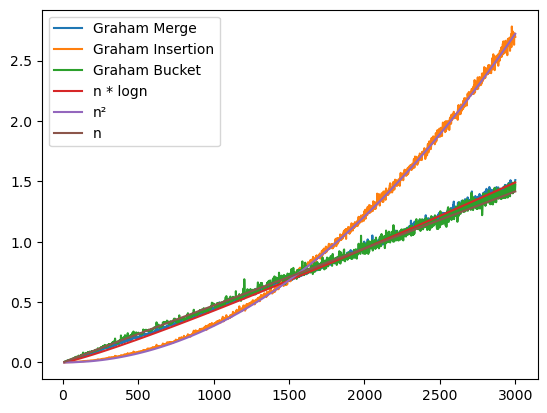

In [17]:
constante_central_nlogn = datfram['G_Merge'][1501] / (np.log(1501) * 1501)
constante_central_n2 = datfram['G_Merge'][1501] / 1501 ** 2
constante_central_n = datfram['G_Merge'].mean() / 1501
constante_central_bucket = datfram['G_Merge'][1501] / datfram['G_Bucket'][1501]
constante_central_insertion = datfram['G_Merge'][1501] / datfram['G_Insertion'][1501]
constante_central_jarvis = datfram['G_Merge'][1501] / datfram['Jarvis'][1501]

plt.plot(datfram['G_Merge'], label='Graham Merge')
plt.plot(datfram['G_Insertion'] * constante_central_insertion, label='Graham Insertion')
plt.plot(datfram['G_Bucket'] * constante_central_bucket, label='Graham Bucket')
plt.plot(np.int32(np.linspace(10, 3000, 1990)), np.linspace(10, 3000, 1990) * np.log(np.linspace(10, 3000, 1990)) * constante_central_nlogn, label='n * logn')
plt.plot(np.int32(np.linspace(10, 3000, 1990)), np.linspace(10, 3000, 1990) ** 2 * constante_central_n2, label='n²')
plt.plot(np.int32(np.linspace(10, 3000, 1990)), np.linspace(10, 3000, 1990) * constante_central_n, label='n')
plt.legend()

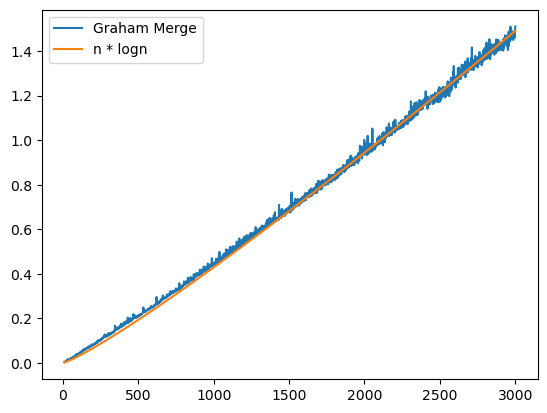

In [18]:
plt.plot(datfram['G_Merge'], label='Graham Merge')
plt.plot(np.int32(np.linspace(10, 3000, 1990)), np.linspace(10, 3000, 1990) * np.log(np.linspace(10, 3000, 1990)) * constante_central_nlogn, label='n * logn')
plt.legend()

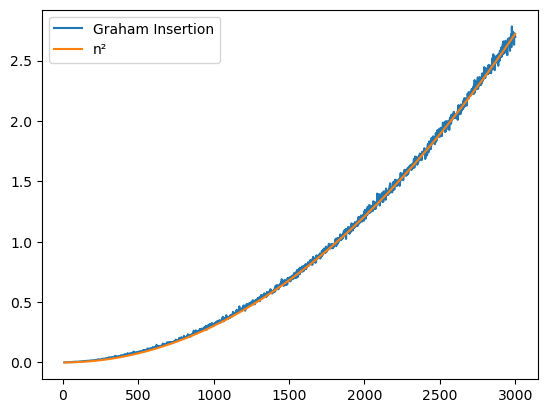

In [19]:
plt.plot(datfram['G_Insertion'] * constante_central_insertion, label='Graham Insertion')
plt.plot(np.int32(np.linspace(10, 3000, 1990)), np.linspace(10, 3000, 1990) ** 2 * constante_central_n2, label='n²')
plt.legend()

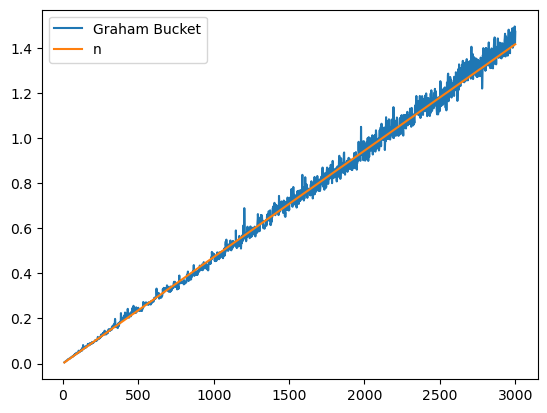

In [20]:
plt.plot(datfram['G_Bucket'] * constante_central_bucket, label='Graham Bucket')
plt.plot(np.int32(np.linspace(10, 3000, 1990)), np.linspace(10, 3000, 1990) * constante_central_n, label='n')
plt.legend()

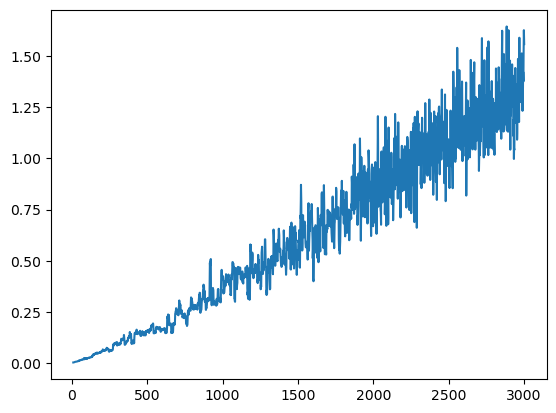

In [8]:
plt.plot(datfram['Jarvis'], label='Jarvis')